In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

from glob import glob

In [2]:
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16) 

In [13]:
def get_whole_dataframe(path, approach, xlabel):
    files = glob(path)

    df = pd.DataFrame()

    for file_ in files:
        temp_df = pd.read_csv(file_)
        temp_df["approach"] = approach
        temp_df["xlabel"] = xlabel
        df = df.append(temp_df)
    
    return df

In [4]:
all_df = pd.DataFrame()
all_df = all_df.append(get_whole_dataframe("../results/generalized/c_freundii/*plasmid*.csv", "plASgraph", "c_freundii-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/c_freundii/*plasmid*.csv", "PlasForest", "c_freundii-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/k_oxytoca/*plasmid*.csv", "plASgraph", "k_oxytoca-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/k_oxytoca/*plasmid*.csv", "PlasForest", "k_oxytoca-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/s_pseudintermedius/*plasmid*.csv", "plASgraph", "s_pseudintermedius-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/s_pseudintermedius/*plasmid*.csv", "PlasForest", "s_pseudintermedius-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/v_parahaemolyticus/*plasmid*.csv", "plASgraph", "v_parahaemolyticus-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/v_parahaemolyticus/*plasmid*.csv", "PlasForest", "v_parahaemolyticus-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/b_megaterium/*plasmid*.csv", "plASgraph", "b_megaterium-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/b_megaterium/*plasmid*.csv", "PlasForest", "b_megaterium-PlasForest"))

In [5]:
# calculate number of plasmids
all_df["predicted_plasmids"] = all_df["tp"] + all_df["fp"]
all_df["ground_truth_plasmids"] = all_df["tp"] + all_df["fn"]



In [6]:
all_df.to_csv("../results/predictions_comparison/generalized_comparison_plasmid.csv", index=False)

In [7]:
# keep only isolates with plasmid for plotting and set NA to 0
all_df = all_df.fillna(0)
all_df = all_df[all_df["ground_truth_plasmids"] != 0]

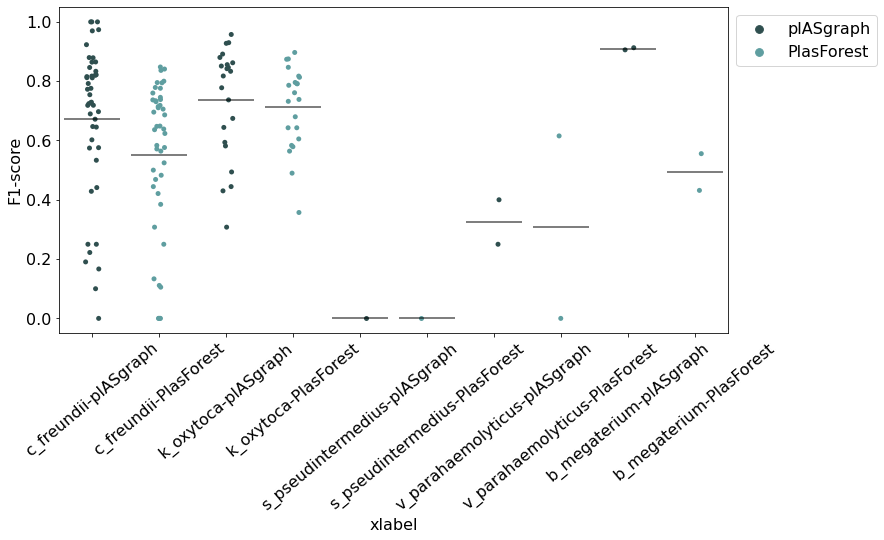

In [8]:
plt.figure(figsize=(12,6))

p = sns.stripplot(x="xlabel", y="f1_score", data=all_df, hue="approach", palette=["darkslategrey", "cadetblue"])

# draw mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={"color": "k", "ls": "-", "lw": 2, "alpha" : 0.5},
            medianprops={"visible": False},
            whiskerprops={"visible": False},
            zorder=10,
            x="xlabel",
            y="f1_score",
            data=all_df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)

p.set_xticklabels(p.get_xticklabels(), rotation=40)
plt.ylabel("F1-score")

p.legend_.set_title(None)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("../results/figures/generalized_f1_comparison_plasmid.png", dpi=600, format="png", bbox_inches="tight")
plt.show()
plt.clf()
plt.close()

In [9]:
all_df = pd.DataFrame()
all_df = all_df.append(get_whole_dataframe("../results/generalized/c_freundii/*chromosome*.csv", "plASgraph", "c_freundii-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/c_freundii/*chromosome*.csv", "PlasForest", "c_freundii-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/k_oxytoca/*chromosome*.csv", "plASgraph", "k_oxytoca-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/k_oxytoca/*chromosome*.csv", "PlasForest", "k_oxytoca-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/s_pseudintermedius/*chromosome*.csv", "plASgraph", "s_pseudintermedius-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/s_pseudintermedius/*chromosome*.csv", "PlasForest", "s_pseudintermedius-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/v_parahaemolyticus/*chromosome*.csv", "plASgraph", "v_parahaemolyticus-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/v_parahaemolyticus/*chromosome*.csv", "PlasForest", "v_parahaemolyticus-PlasForest"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/b_megaterium/*chromosome*.csv", "plASgraph", "b_megaterium-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/plasforest_generalized/b_megaterium/*chromosome*.csv", "PlasForest", "b_megaterium-PlasForest"))

In [10]:
# calculate number of plasmids
all_df["predicted_chromosome"] = all_df["tp"] + all_df["fp"]
all_df["ground_truth_chromosome"] = all_df["tp"] + all_df["fn"]

In [11]:
all_df.to_csv("../results/predictions_comparison/generalized_comparison_chromosome.csv", index=False)

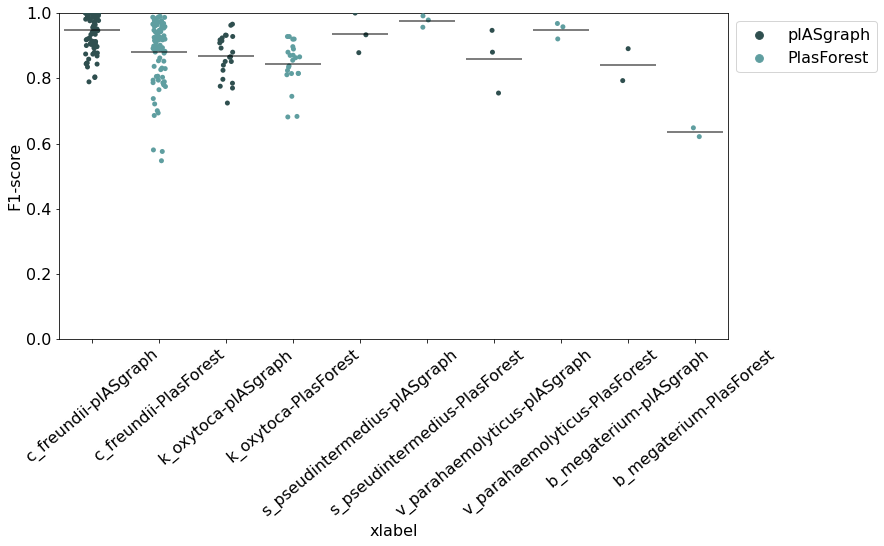

In [12]:
plt.figure(figsize=(12,6))

p = sns.stripplot(x="xlabel", y="f1_score", data=all_df, hue="approach", palette=["darkslategrey", "cadetblue"])

# draw mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={"color": "k", "ls": "-", "lw": 2, "alpha" : 0.5},
            medianprops={"visible": False},
            whiskerprops={"visible": False},
            zorder=10,
            x="xlabel",
            y="f1_score",
            data=all_df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)

p.set_xticklabels(p.get_xticklabels(), rotation=40)
plt.ylabel("F1-score")

plt.ylim(0,1)

p.legend_.set_title(None)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("../results/figures/generalized_f1_comparison_chromosome.png", dpi=600, format="png", bbox_inches="tight")
plt.show()
plt.clf()
plt.close()

In [7]:
all_df = pd.read_csv("../results/predictions_comparison/generalized_comparison_plasmid.csv")

In [8]:
# keep only isolates with plasmid for plotting and set NA to 0
all_df = all_df.fillna(0)
all_df = all_df[all_df["ground_truth_plasmids"] != 0]

In [9]:
all_df = pd.melt(all_df, id_vars=['approach'], value_vars=['recall', 'precision', 'f1_score'])

In [10]:
all_df["xlabel"] = all_df["approach"] + "_" + all_df["variable"]

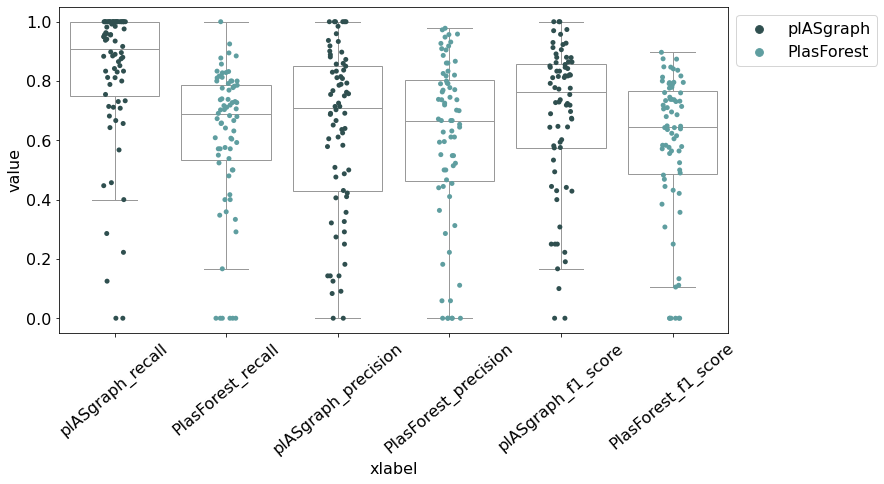

In [11]:
plt.figure(figsize=(12,6))

p = sns.boxplot(x="xlabel", y="value", data=all_df, linewidth=1, color="white", showfliers = False)
p = sns.stripplot(x="xlabel", y="value", data=all_df, hue="approach", palette=["darkslategrey", "cadetblue"])

#plt.ylabel("F1-score")

p.set_xticklabels(p.get_xticklabels(), rotation=40)
p.legend_.set_title(None)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.ylim(-0.05,1.05)

plt.savefig("../results/figures/generalized_all_metrics_plasmid.png", dpi=600, format="png", bbox_inches="tight")
plt.show()
plt.clf()
plt.close()

In [21]:
all_df = pd.DataFrame()
all_df = all_df.append(get_whole_dataframe("../results/generalized/c_freundii/*ambiguous.csv", "plASgraph", "c_freundii-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/k_oxytoca/*ambiguous.csv", "plASgraph", "k_oxytoca-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/s_pseudintermedius/*ambiguous.csv", "plASgraph", "s_pseudintermedius-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/v_parahaemolyticus/*ambiguous.csv", "plASgraph", "v_parahaemolyticus-plASgraph"))
all_df = all_df.append(get_whole_dataframe("../results/generalized/b_megaterium/*ambiguous.csv", "plASgraph", "b_megaterium-plASgraph"))

In [22]:
# calculate number of ambiguous
all_df["predicted_ambiguous"] = all_df["tp"] + all_df["fp"]
all_df["ground_truth_ambiguous"] = all_df["tp"] + all_df["fn"]


In [23]:
all_df.to_csv("../results/predictions_comparison/generalized_comparison_ambiguous_only.csv", index=False)

In [24]:
# keep only isolates with ambiguous contigs for plotting and set NA to 0
all_df = all_df.fillna(0)
all_df = all_df[all_df["ground_truth_ambiguous"] != 0]

In [25]:
# change f1 score name for figure
all_df["F1-score"] = all_df["f1_score"]

In [26]:
all_df = pd.melt(all_df, id_vars=['approach'], value_vars=['recall', 'precision', 'F1-score'])

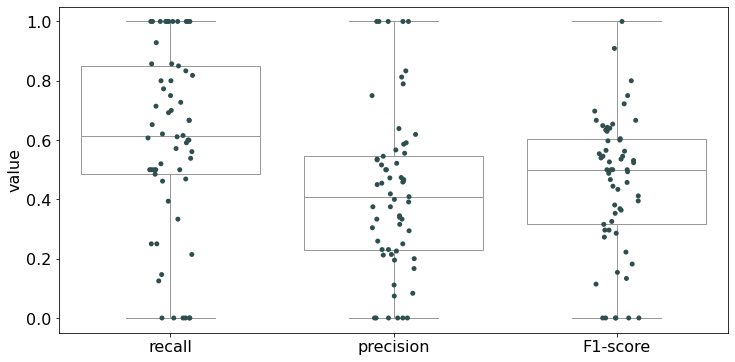

In [27]:
plt.figure(figsize=(12,6))

p = sns.boxplot(x="variable", y="value", data=all_df, linewidth=1, color="white", showfliers = False)
p = sns.stripplot(x="variable", y="value", data=all_df, color="darkslategrey")

p.set_xticklabels(p.get_xticklabels())

plt.xlabel("")
plt.ylim(-0.05,1.05)

plt.savefig("../results/figures/generalized_all_metrics_ambiguous_only.png", dpi=600, format="png", bbox_inches="tight")
plt.show()
plt.clf()
plt.close()